In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

import yfinance as yf

import pandas_datareader.data as web

C:\Users\New User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
end = '2022-04-05'
# df = web.DataReader('ETH-USD', 'yahoo', end = end)
df = yf.Ticker("ETH-USD").history(period='max',interval='1d')
df = df[['Close']].copy()
indexedDataset = df.index

In [3]:
# determine rolling statistics
rolmean = df.rolling(window = 12).mean()

rolstd = df.rolling(window = 12).std()

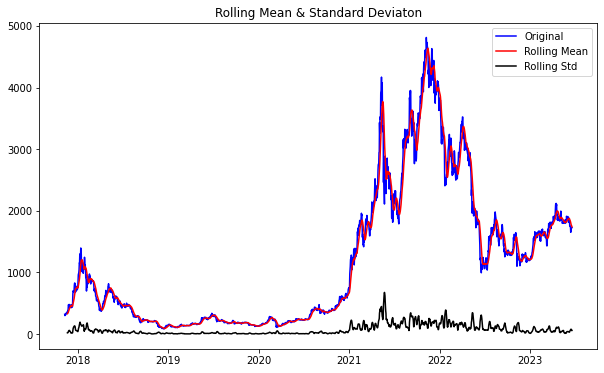

In [4]:
#plot rolling statistics:
orig = plt.plot(df, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviaton')
plt.show(block=False)

In [5]:
# Perform rolling statistics:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df['Close'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

C:\Users\New User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


Results of Dickey-Fuller Test:
Test Statistic                   -1.441390
p-value                           0.562280
#Lags Used                       17.000000
Number of Observations Used    2031.000000
Critical Value (1%)              -3.433574
Critical Value (5%)              -2.862964
Critical Value (10%)             -2.567528
dtype: float64


In [6]:
log_df = np.log(df)

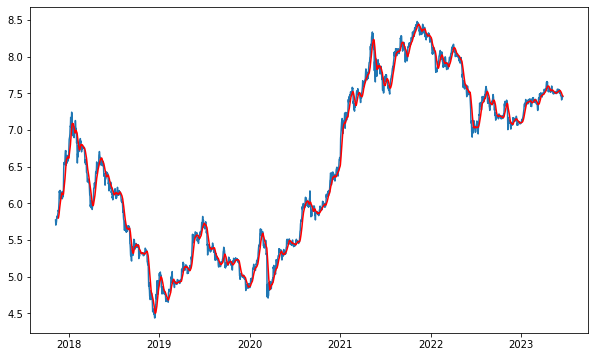

In [7]:
movingAverage = log_df.rolling(window = 12).mean()
movingStd = log_df.rolling(window = 12).std()
plt.plot(log_df)
plt.plot(movingAverage,color = 'red')

In [8]:
log_minus_MvAverage = log_df - movingAverage
log_minus_MvAverage.dropna(inplace = True)

In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Daterminig rolling statistics
    movingAverage = timeseries.rolling(window = 12).mean()
    movingStd = timeseries.rolling(window = 12).std()
    
    #plot rolling statistics:
    orig = plt.plot(timeseries, color = 'blue')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingStd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    # Perform dickey fuller test;
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    print(dfoutput)

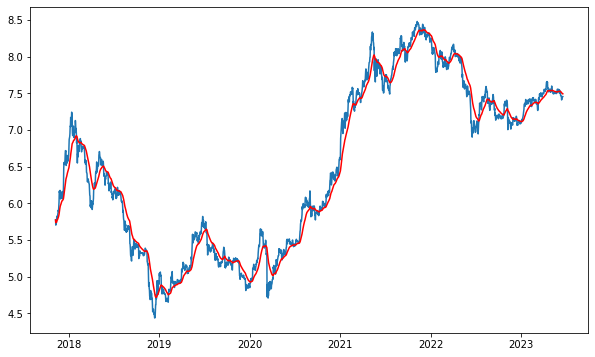

In [10]:
exponentialDecayWeightAverage = log_df.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(log_df)
plt.plot(exponentialDecayWeightAverage, color = 'red')

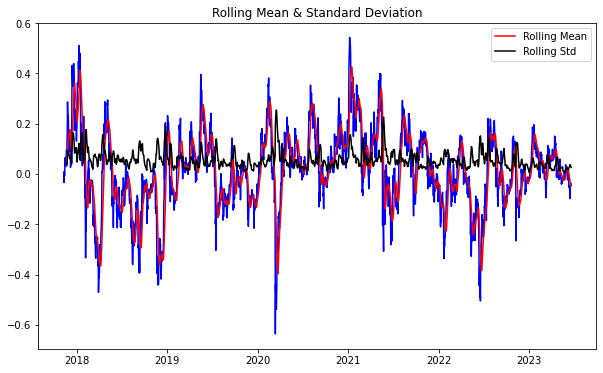

Results of Dickey-Fuller Test:
Test Statistic                -6.782922e+00
p-value                        2.473196e-09
#Lags Used                     2.000000e+00
Number of Observations Used    2.046000e+03
Critical Value(1%)            -3.433550e+00
Critical Value(5%)            -2.862954e+00
Critical Value(10%)           -2.567523e+00
dtype: float64


In [11]:
datasetLogScaleMovingExponentialDecayAverage = log_df - exponentialDecayWeightAverage
test_stationarity(datasetLogScaleMovingExponentialDecayAverage)

In [12]:
# log_diff = log_df - log_df.shift()
# plt.plot(datasetLogDiffShifting)

In [13]:
# datasetLogDiffShifting.dropna(inplace = True)
# test_stationarity(datasetLogDiffShifting)

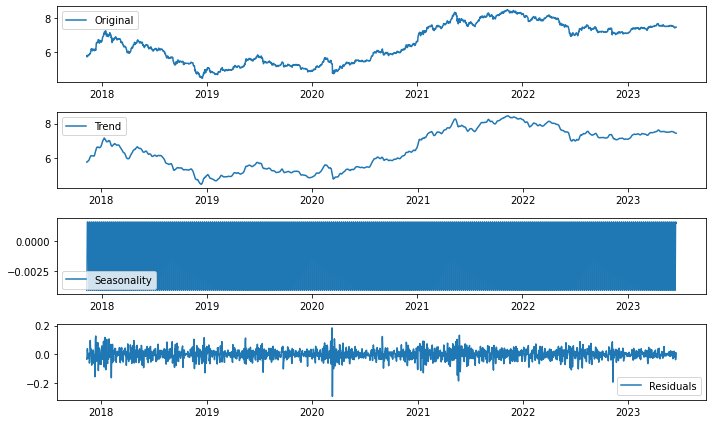

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(log_df)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(log_df, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()



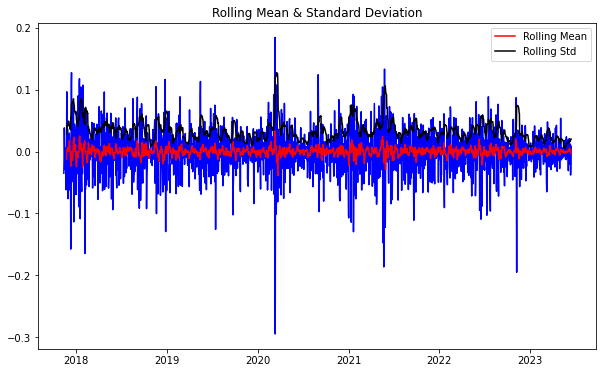

Results of Dickey-Fuller Test:
Test Statistic                -1.571601e+01
p-value                        1.341592e-28
#Lags Used                     2.200000e+01
Number of Observations Used    2.020000e+03
Critical Value(1%)            -3.433591e+00
Critical Value(5%)            -2.862972e+00
Critical Value(10%)           -2.567532e+00
dtype: float64


In [15]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

In [16]:
# from statsmodels.tsa.stattools import acf, pacf

# lag_acf = acf(log_diff, nlags = 20)
# lag_pacf = pacf(log_diff, nlags  = 20, method = 'ols')

# #plot ACF
# plt.subplot(121)
# plt.plot(lag_acf)
# plt.axhline(y=0, linstyle = '- - ', color = 'gray')
# plt.axhline(y=-1.96/np.sqrt(len(log_diff)), linestyle = '--', color = 'gray')
# plt.axhline(y = 1.96/np.sqrt(len(log_diff)), linestyle = '--', color = 'gray')
# plt.title('Autocorrelation Function')

# ARIMA model

C:\Users\New User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Ploting AR model


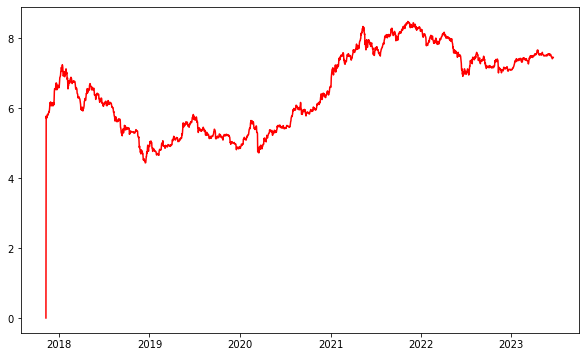

In [17]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(log_df,order = (1,1,1), freq = 'D')
fitted = model.fit()
# plt.plot(log_diff)
plt.plot(fitted.fittedvalues, color = 'red')
# plt.title('RSS: %.4f'%sum((fitted.fittedvalues-log_diff)**2))
print('Ploting AR model')

In [18]:
predictions_ARIMA_diff = pd.Series(fitted.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())


Date
2017-11-09 00:00:00+00:00    0.000000
2017-11-10 00:00:00+00:00    5.771080
2017-11-11 00:00:00+00:00    5.704544
2017-11-12 00:00:00+00:00    5.747000
2017-11-13 00:00:00+00:00    5.733981
dtype: float64


In [19]:
#convert to comulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2017-11-09 00:00:00+00:00     0.000000
2017-11-10 00:00:00+00:00     5.771080
2017-11-11 00:00:00+00:00    11.475623
2017-11-12 00:00:00+00:00    17.222623
2017-11-13 00:00:00+00:00    22.956604
dtype: float64


In [20]:
predictions_ARIMA_log = pd.Series(log_df.iloc[0], index = log_df.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

Date
2017-11-09 00:00:00+00:00     0.000000
2017-11-10 00:00:00+00:00     5.771080
2017-11-11 00:00:00+00:00    11.475623
2017-11-12 00:00:00+00:00    17.222623
2017-11-13 00:00:00+00:00    22.956604
dtype: float64

In [21]:
# predictions_ARIMA = np.exp(predictions_ARIMA_log)
# plt.plot(df)
# plt.plot(predictions_ARIMA)

In [22]:
# fitted.plot_predict(1,264)
x = fitted.forecast(steps=30)

In [23]:
ratio = int(0.9*len(log_df))

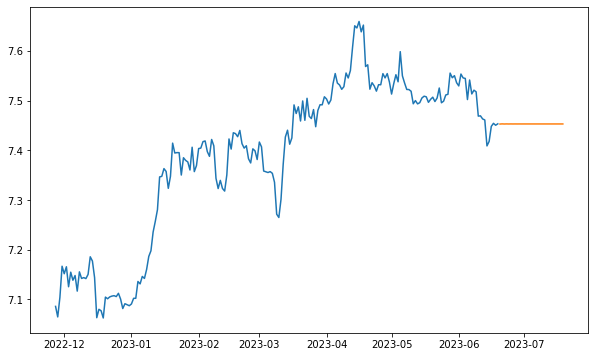

In [24]:
plt.plot(log_df[ratio:])
plt.plot(x)

In [25]:
price_pred = np.exp(x)

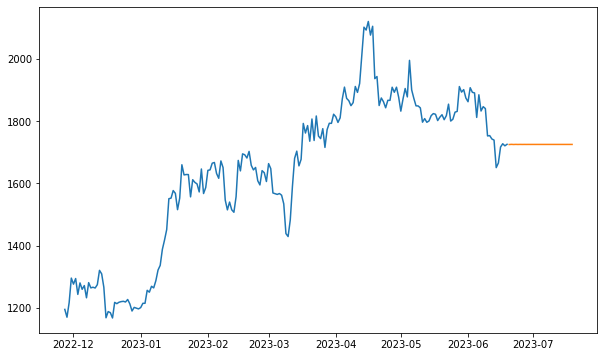

In [26]:
plt.plot(df[ratio:])
plt.plot(price_pred)


In [27]:
data = [x for x in log_df.Close]
predictions = []
price_predictions = []
for t in range(30):
    model = ARIMA(data, order = (1,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred = output[0]
    predictions.append(pred)
    obs = predictions[t]
    data.append(obs)
#     for price in df:
#         price_pred =  df.iloc[(len(train) + t)]* math.exp(pred)
#         price_predictions.append(price_pred)

In [28]:
predictions = pd.DataFrame(predictions)
index_future_dates = pd.date_range(start = max(df.index),freq='1d',periods=30)
len(predictions)
len(index_future_dates)

30

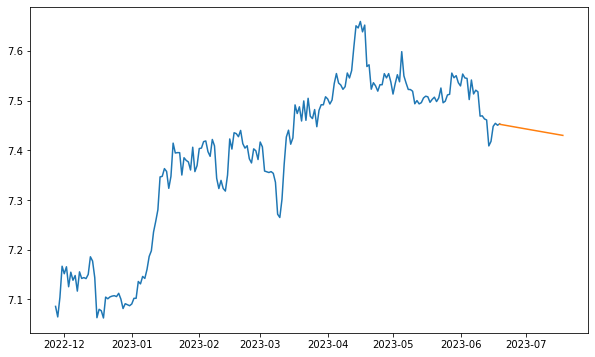

In [29]:
predictions.index = index_future_dates
plt.plot(log_df[ratio:])
plt.plot(predictions)

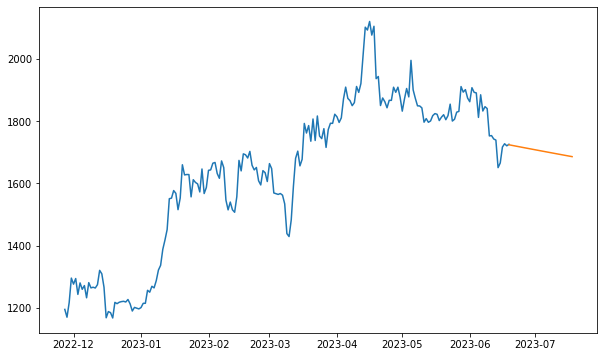

In [30]:
price_predictions = np.exp(predictions)

plt.plot(df[ratio:])
plt.plot(price_predictions)

In [31]:
resid = fitted.resid

In [32]:
from sklearn.metrics import mean_squared_error

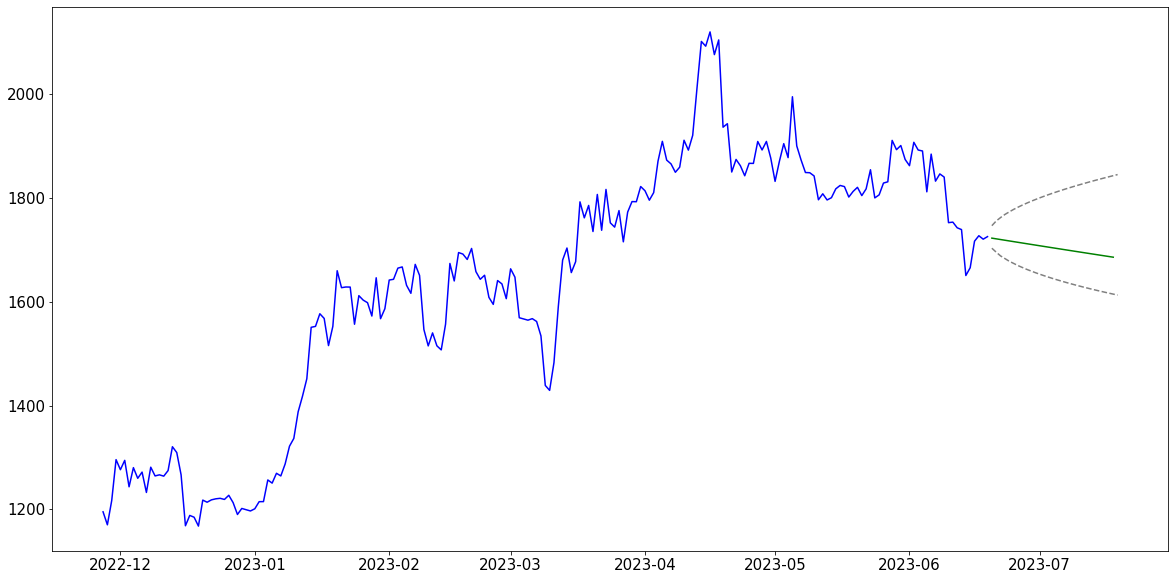

In [33]:
plt.figure(figsize = (20,10))

arma_forecast = fitted.get_forecast(30)
arma_predictions_df = arma_forecast.conf_int(alpha = 0.8)
arma_predictions_df["Predictions"] = predictions

final_pred = np.exp(arma_predictions_df)
ratio = int(len(df)*0.9)
plt.plot(df[ratio:], color = 'blue')
plt.plot(final_pred["Predictions"], color = "green", label = "Predictions")
plt.plot(final_pred["upper Close"], color = "gray", linestyle = "--", label = "Conidence Levels(95%)")
plt.plot(final_pred["lower Close"], color = "gray", linestyle = "--")

plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [34]:
final_pred

,lower Close,upper Close,Predictions
2023-06-20 00:00:00+00:00,1703.137146,1746.549714,1722.553766
2023-06-21 00:00:00+00:00,1695.504109,1755.597466,1721.211721
2023-06-22 00:00:00+00:00,1688.323048,1762.172780,1719.871996
2023-06-23 00:00:00+00:00,1683.243634,1768.160779,1718.534588
2023-06-24 00:00:00+00:00,1678.073187,1773.104791,1717.199493
2023-06-25 00:00:00+00:00,1673.927585,1777.874668,1715.866708
2023-06-26 00:00:00+00:00,1669.740396,1782.048519,1714.536229
2023-06-27 00:00:00+00:00,1666.134178,1786.119305,1713.208052
2023-06-28 00:00:00+00:00,1662.543750,1789.816116,1711.882175
2023-06-29 00:00:00+00:00,1659.309939,1793.424783,1710.558594


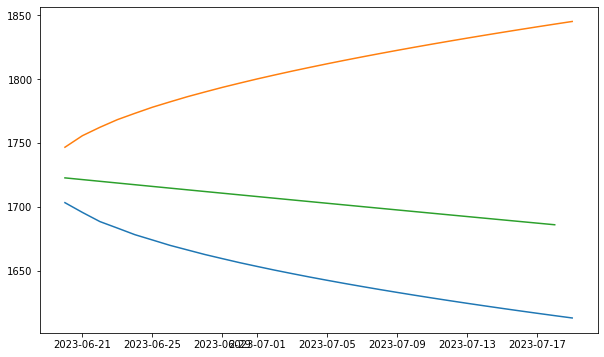

In [35]:
plt.plot(np.exp(arma_predictions_df))

In [36]:
import numpy as np

In [37]:
# arma_predictions_df.head()

In [38]:
final_pred = np.exp(arma_predictions_df)

In [39]:
# final_pred.head()
# new_final_pred = final_pred.copy()

# new_final_pred.head()

In [40]:
std = 77

In [41]:
# final_pred

In [42]:
# final_pred.mean

In [43]:
upper = []
lower = []
for i in range(30):
    for p in final_pred['Predictions']:
        low = p - 1.96*std
        up = p + 1.96*std
        upper.append(up)
        lower.append(low)
    #         print(p)

In [44]:
upper = pd.Series(upper)
lower = pd.Series(lower)
pred_ = final_pred.Predictions
pred__ = pd.Series(pred_)
upper = upper[:30]
lower = lower[:30]

new_pred = pd.DataFrame({
#     'predictions':pred_,
    'lower Close':lower,
    'upper Close':upper,
    
})
new_pred.head()
lower.head()
pred_.head()
new_pred.head()
new_pred.index = index_future_dates
len(new_pred)

30

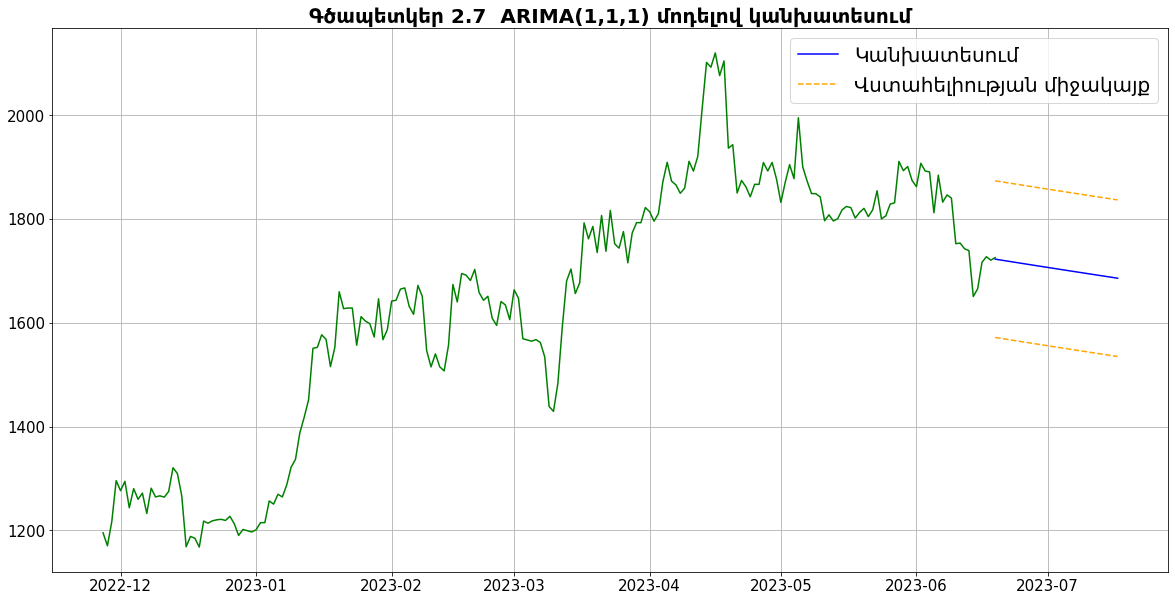

In [45]:
plt.figure(figsize = (20,10))


plt.plot(df[ratio:], color = 'green', label = '')
plt.plot(index_future_dates,final_pred["Predictions"], color = "blue", label = "Կանխատեսում")
plt.plot(new_pred["upper Close"][index_future_dates], color = "orange", linestyle = "--", label = "Վստահելիության միջակայք")
plt.plot(new_pred["lower Close"][index_future_dates], color = "orange", linestyle = "--")
plt.title('Գծապետկեր 2.7  ARIMA(1,1,1) մոդելով կանխատեսում', fontsize = 20, fontweight = 'bold')
plt.legend(loc = 'best', fontsize = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()
plt.show()

In [46]:
new_eth = yf.Ticker('ETH-USD').history()

new_eth_close = new_eth.Close

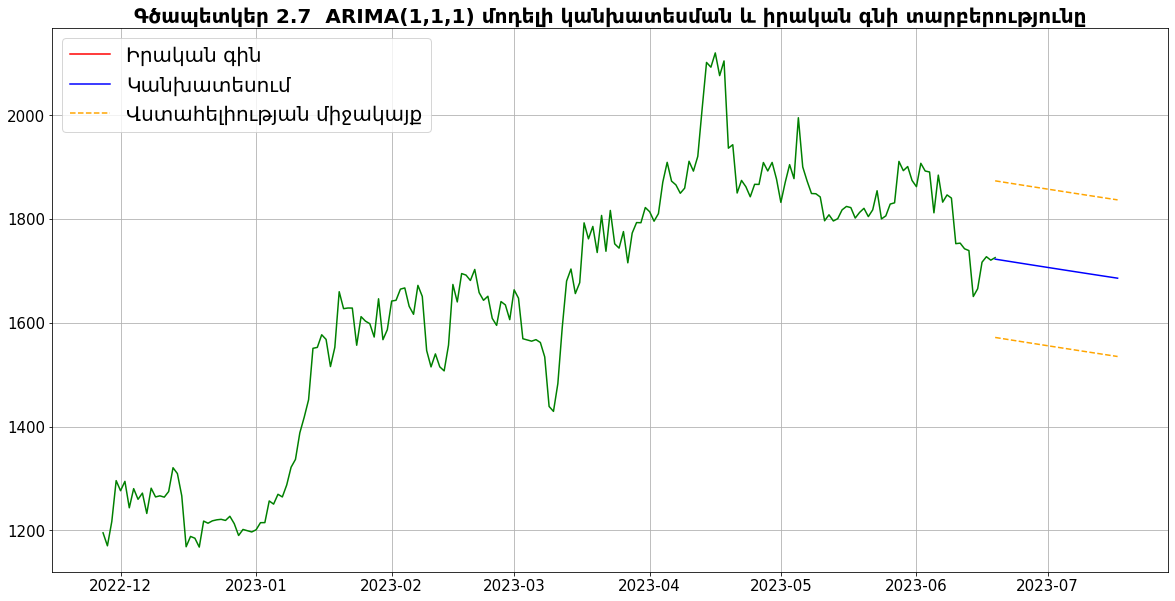

In [47]:
plt.figure(figsize = (20,10))

plt.plot(new_eth_close[ratio:], color = 'red', label = "Իրական գին")

arma_forecast = fitted.get_forecast(30)
arma_predictions_df = arma_forecast.conf_int(alpha = 0.05)
arma_predictions_df["Predictions"] = predictions

final_pred = np.exp(arma_predictions_df)
ratio = int(len(df)*0.9, )
plt.plot(df[ratio:], color = 'green', label = '')
plt.plot(index_future_dates,final_pred["Predictions"], color = "blue", label = "Կանխատեսում")
plt.plot(new_pred["upper Close"][index_future_dates], color = "orange", linestyle = "--", label = "Վստահելիության միջակայք")
plt.plot(new_pred["lower Close"][index_future_dates], color = "orange", linestyle = "--")
plt.title('Գծապետկեր 2.7  ARIMA(1,1,1) մոդելի կանխատեսման և իրական գնի տարբերությունը', fontsize = 20, fontweight = 'bold')
plt.legend(loc = 'best', fontsize = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()
plt.show()

In [48]:
# plt.figure(figsize = (20,10))

# arma_forecast = fitted.get_forecast(30)
# arma_predictions_df = arma_forecast.conf_int(alpha = 0.05)
# arma_predictions_df["Predictions"] = predictions

# final_pred = np.exp(arma_predictions_df)
# ratio = int(len(df)*0.9)
# plt.plot(df[ratio:], color = 'blue')
# plt.plot(new_final_pred["Predictions"][index_future_dates], color = "green", label = "Predictions")
# plt.plot(new_final_pred["upper Close "][index_future_dates], color = "gray", linestyle = "--", label = "Conidence Levels(95%)")
# plt.plot(new_final_pred["lower Close"][index_future_dates], color = "gray", linestyle = "--")

# plt.xticks(size = 15)
# plt.yticks(size = 15)
# plt.show()

In [49]:
model = ARIMA(log_df, order=(1,1,1), enforce_invertibility=True, freq = 'D')

results = model.fit()

# results.summary()

C:\Users\New User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [50]:
predictions_int = results.get_forecast(steps=30)
predictions_int.predicted_mean
predictions_int.conf_int()

,lower Close,upper Close
2023-06-20 00:00:00+00:00,7.355450,7.550175
2023-06-21 00:00:00+00:00,7.318426,7.587874
2023-06-22 00:00:00+00:00,7.287295,7.618499
2023-06-23 00:00:00+00:00,7.262707,7.643466
2023-06-24 00:00:00+00:00,7.239864,7.666024
2023-06-25 00:00:00+00:00,7.220011,7.686091
2023-06-26 00:00:00+00:00,7.201173,7.704769
2023-06-27 00:00:00+00:00,7.184044,7.722018
2023-06-28 00:00:00+00:00,7.167656,7.738316
2023-06-29 00:00:00+00:00,7.152368,7.753672


In [51]:
predictions.head()

,0
2023-06-19 00:00:00+00:00,7.452343
2023-06-20 00:00:00+00:00,7.451563
2023-06-21 00:00:00+00:00,7.450784
2023-06-22 00:00:00+00:00,7.450005
2023-06-23 00:00:00+00:00,7.449227


In [52]:
conf_df = pd.concat([predictions,predictions_int.predicted_mean, predictions_int.conf_int()], axis = 1)

conf_df.head()

,0,predicted_mean,lower Close,upper Close
2023-06-19 00:00:00+00:00,7.452343,NaN,NaN,NaN
2023-06-20 00:00:00+00:00,7.451563,7.452812,7.355450,7.550175
2023-06-21 00:00:00+00:00,7.450784,7.453150,7.318426,7.587874
2023-06-22 00:00:00+00:00,7.450005,7.452897,7.287295,7.618499
2023-06-23 00:00:00+00:00,7.449227,7.453087,7.262707,7.643466


In [53]:
conf_df = conf_df.rename(columns={0: 'Predictions', 'lower MI': 'Lower CI', 'upper MI': 'Upper CI'})
conf_df.head()

,Predictions,predicted_mean,lower Close,upper Close
2023-06-19 00:00:00+00:00,7.452343,NaN,NaN,NaN
2023-06-20 00:00:00+00:00,7.451563,7.452812,7.355450,7.550175
2023-06-21 00:00:00+00:00,7.450784,7.453150,7.318426,7.587874
2023-06-22 00:00:00+00:00,7.450005,7.452897,7.287295,7.618499
2023-06-23 00:00:00+00:00,7.449227,7.453087,7.262707,7.643466


In [54]:
conf_df = np.exp(conf_df)

In [55]:
# fig = plt.figure(figsize = (16,8))

# ax1 = fig.add_subplot(111)

# plt.plot(df[ratio:], color = 'blue')
# x = conf_df.index.values


# upper = conf_df['upper Close']
# lower = conf_df['lower Close']

# conf_df['predicted_mean'].plot(color = 'blue', label = 'Actual')
# conf_df['Predictions'].plot(color = 'orange',label = 'Predicted' )
# upper.plot(color = 'grey', label = 'upper Close')
# lower.plot(color = 'grey', label = 'lower Close')

# # plot the legend for the first plot
# plt.legend(loc = 'lower left', fontsize = 12)


# # fill between the conf intervals
# plt.fill_between(x, lower, upper, color='grey', alpha = '0.2')
                

# plt.ylim(1000,3500)

# plt.show()